<a href="https://colab.research.google.com/github/jang3463/machinelearning-deeplearning-lecture/blob/main/CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MNIST 데이터 준비 및 시각화

In [2]:
import tensorflow as tf
from tensorflow.keras import datasets

import matplotlib.pyplot as plt


In [3]:
(X_train,y_train),(X_test,y_test) = datasets.mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [4]:
# 이미지를 가져왔으니까 시각화 해보고, 형상(shape) 확인해보기

image = X_train[0]
image.shape

(28, 28)

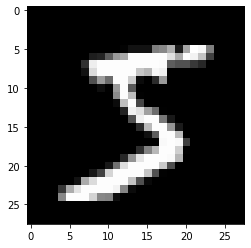

In [5]:
plt.imshow(image,'gray')
plt.show()

In [6]:
# 실제 CNN 레이어에 집어 넣기 위해서는 4차원 형태를 유지해야 한다.
# (N,H,W,C) -> (배치크기, 높이, 가로 , 채널)
# MNIST 손글씨 이미지 : 높이 -28px, 가로 -28px, 채널 -1

image = image[tf.newaxis, ...,tf.newaxis]
image.shape

(1, 28, 28, 1)

# Conv2D 레이어 사용하기
# keras의 대표적인 CNN레이어는 두가지가 있다.
- Conv2D
    - 'stride'가 2방향으로 움직인다. (가로,세로)
    - 이미지 분석을 위해 사용되는 일반적인 합성곱 레이어
- Conv1D
    - 'stride'가 1방향으로 움직인다. (세로)
    - 텍스트 분석을 위해 사용되는 레이어 ('char CNN')

--------
## 매개변수의 정리
- filters : 필터의 개수
- knernel_size : 필터의 크기
- strides : 몇 개의 픽셀을 스킵 하면서 필터가 훓게 할지 결정
- padding : '0'으로 쌓여진 패딩을 만들 것인지에 대한 설정
  - VALID : 패딩을 만들지 않기
  - SAME : 패딩 생성
- activation : 활성화 함수 지정하기. 따로 설정하지 않고 추후 레이어로 추가 가능

In [7]:
tf.keras.layers.Conv2D(
    filters = 3,
    kernel_size = (3,3),
    strides = (1,1),
    padding = 'SAME',
    activation = 'relu'
)

In [8]:
# 필터의 가로,세로 크기 및 스트라이드의 가로 세로를 똑같이 하려면 굳이 튜플로 넣어줄 피룡는 없다.
tf.keras.layers.Conv2D(
    filters = 3,
    kernel_size = 3,
    strides = 1,
    padding = 'SAME',
    activation = 'relu'
)

# Convolution 레이어 시각화

In [9]:
# image를 tensorflow 배열로 만들기
image = tf.cast(image,dtype=tf.float32)
image.dtype

tf.float32

In [10]:
layer = tf.keras.layers.Conv2D(filters = 5, kernel_size = 3, strides = 1, padding = 'same')

In [11]:
# tensorflow에서 레이어에 데이터 전달 하는 방법
output = layer(image)
output.shape

TensorShape([1, 28, 28, 5])

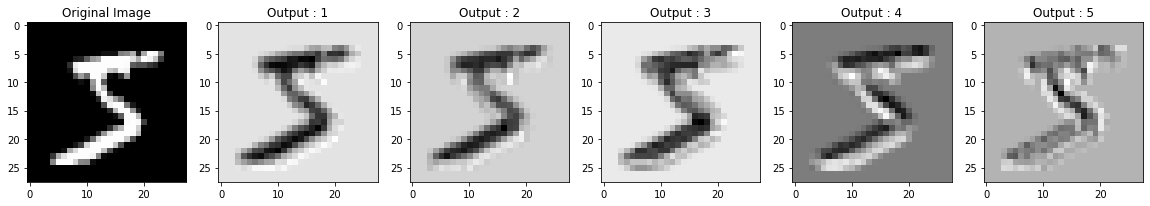

In [12]:
# MNIST 이미지 5에 대한 Conv 레이어 통과 후 시각화

_, axes = plt.subplots(nrows=1, ncols=6, figsize=(20, 10))
axes[0].imshow(image[0, ..., 0], cmap='gray')
axes[0].set_title("Original Image")

for idx, ax in enumerate(axes[1: ]):
  ax.set_title("Output : {}".format(idx + 1))
  ax.imshow(output[0, ..., idx], cmap='gray')

plt.show()

# Filter 시각화 하기
- CNN에서 Filter의 역할은 실제 CNN 레이어가 이미지의 무엇을 보고 있는가를 이야기한다.
- keras의 레이어들은 get_weights() 함수를 이용해서 편향과 가중치 등을 볼 수 있다.

In [13]:
# 케라스의 모든 계산 가능한 레이어에서 매개변수 뽑아내기(가중치, 편향)
# layer - Conv2D 레이어 필터 모양 : ( 3, 3, 1, 5 ) - ( 필터 세로, 필터 가로, 채널 수, 필터 개수 )
weights = layer.get_weights()

In [14]:
print("가중치의 형상 : {}".format(weights[0].shape))
print("편향의 형상 : {}".format(weights[1].shape))

가중치의 형상 : (3, 3, 1, 5)
편향의 형상 : (5,)


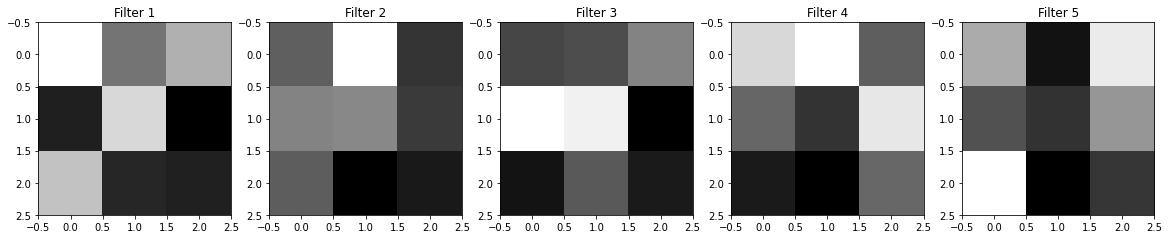

In [15]:
# 시각화
_, axes = plt.subplots(nrows=1, ncols=5, figsize=(20, 10))

for idx, ax in enumerate(axes):
  ax.set_title("Filter {}".format(idx + 1))
  ax.imshow(weights[0][..., 0, idx], cmap='gray')
  
plt.show()

# ReLU 레이어 시각화
* 이미지 분석에서 `ReLU`가 자주 사용됩니다.
* 이미지 데이터에서 음수 데이터는 필요가 없는 데이터이다.
 * 필요 없는 음수 데이터는 제거하고, 의미 있는 양수 데이터만 강조하기 위해서 `ReLU`가 일반적으로 사용된다.

In [16]:
import numpy as np
np.min(output), np.max(output)

(-240.8969, 156.13103)

In [17]:
act_layer = tf.keras.layers.ReLU()
act_output = act_layer(output) # 합성곱의 결과가 활성화 레이어로 들어간다.
act_output.shape # output의 형상과 똑같다.

TensorShape([1, 28, 28, 5])

In [18]:
np.min(act_output), np.max(act_output)


(0.0, 156.13103)

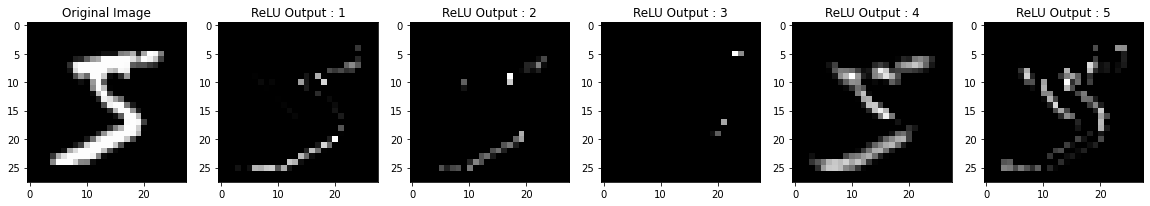

In [19]:
# ReLU 레이어를 통과 시키고 나서의 결과
_, axes = plt.subplots(nrows=1, ncols=6, figsize=(20, 10))

axes[0].imshow(image[0, ..., 0], cmap='gray')
axes[0].set_title("Original Image")

for idx, ax in enumerate(axes[1:]):
  ax.set_title("ReLU Output : {}".format(idx + 1))
  ax.imshow(act_output[0, ..., idx], cmap='gray')

plt.show()

# MaxPooling 레이어 확인하기
이미지 A와 이미지 B가 예를 들어 1px 정도만 차이나는 굉장히 유사한 이미지라면, 그 결과물도 유사하게 나타나게 하기 위한 처리

In [20]:
pool_layer = tf.keras.layers.MaxPool2D(pool_size=(2, 2), strides=(2, 2), padding='SAME')
pool_output = pool_layer(act_output)

pool_output.shape

TensorShape([1, 14, 14, 5])

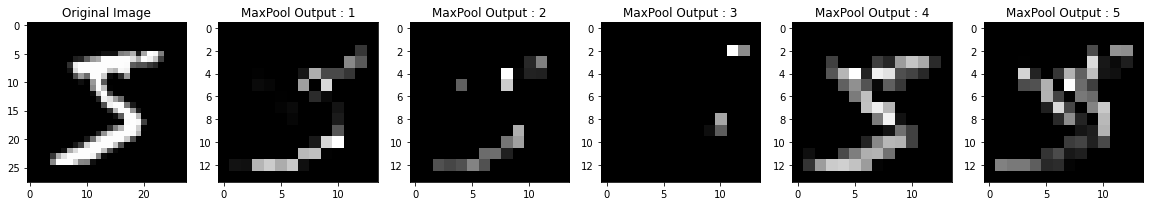

In [21]:
_, axes = plt.subplots(nrows=1, ncols=6, figsize=(20, 10))

axes[0].imshow(image[0, ..., 0], cmap='gray')
axes[0].set_title("Original Image")

for idx, ax in enumerate(axes[1:]):
  ax.set_title("MaxPool Output : {}".format(idx + 1))
  ax.imshow(pool_output[0, ..., idx], cmap='gray')

plt.show()

예측을 위한 과정 만들기

예측을 하겠다 라는 이야기는 $WX+B$를 하겠다 라는 이야기 입니다. 즉 모든 데이터는 1차원 형태로 만들어져서 뉴런에 들어가야한다.

# Flatten 레이어 확인하기
* MaxPool2D 까지는 특징 추출 과정
 * 에측을 하기 위한 과정이 아닌, 데이터에 대한 특징만 추출
* 예측을 하기 위해서는 Fully Connected 과정이 필요하다.
 * Dense 레이어를 사용할 것임
* Fully Connected Layer를 사용하기 위해서는 데이터가 평탄화 되어 있어야 한다.

In [22]:
flatten_layer = tf.keras.layers.Flatten()
flatten_output = flatten_layer(pool_output)

flatten_output.shape # ( 1, 14, 14, 5 ) 형상의 데이터에서 배치크기 정보(1)를 제외한 픽셀, 필터 개수 정보가 모두 곱해져서 (1, 980)이 ㄷ

TensorShape([1, 980])

# Dense 레이어 확인하기 ( Affine )
* 계산 과정($WX+B$)을 위한 Dense 레이어 - Fully Connected 레이어 라고도 한다.

In [23]:
# 유닛이 32개인 Dense 레이어 만들기
dense_layer = tf.keras.layers.Dense(32, activation='relu')
dense_output = dense_layer(flatten_output)

dense_output.shape

TensorShape([1, 32])

In [24]:
# 출력층 설계
# 숫자의 개수는 10개니까, 출력층의 output 개수도 10개
dense_layer2 = tf.keras.layers.Dense(10, activation='softmax')
dense_output2 = dense_layer2(dense_output)

dense_output2.shape

TensorShape([1, 10])

# Keras를 활용한 CNN 레이어 종합
* 합성곱 레이어를 두번 통과
* 은닉층 1개
* 츨력층 1개

In [25]:
# 특성 추출을 위한 레이어 준비 ( Conv2D, Activation, MaxPool2D )
from tensorflow.keras.layers import Conv2D, Activation, MaxPool2D

# 데이터 입력을 위한 레이어 (Input). 입력층 레이어
from tensorflow.keras.layers import Input

# Classification을 위한 레이어 ( Fully Connected Layer 재료 - Dense, Dropout, Flatten)
from tensorflow.keras.layers import Dense, Dropout, Flatten

In [26]:
# 1. 입력 데이터의 형상 ( 배치 사이즈를 제외한... )
input_shape = ( 28, 28, 1 )

# 2. 분류할 클래스의 개수
num_classes = 10

In [27]:
# 원본 데이터를 입력받는 레이어
inputs = Input(shape = input_shape)

# Feature Extraction(특징 추출) - Convolution 레이어
net = Conv2D(32, 3, padding='SAME')(inputs)
net = Activation('relu')(net)
net = Conv2D(32, 3, padding='SAME')(net)
net = Activation('relu')(net)
net = MaxPool2D((2, 2))(net)
net = Dropout(0.25)(net) # 가중치를 0으로 만들 데이터의 비율 지정 ( 즉 사용하지 않을 데이터의 비율을 지정 ) - 과대적합을 방지

net = Conv2D(64, 3, padding='SAME')(net)
net = Activation('relu')(net)
net = Conv2D(64, 3, padding='SAME')(net)
net = Activation('relu')(net)
net = MaxPool2D((2, 2))(net)
net = Dropout(0.25)(net)

# Fully Connected 구성
net = Flatten()(net)
net = Dense(512)(net)
net = Activation('relu')(net)
net = Dropout(0.25)(net)

# 출력층 구성
net = Dense(num_classes)(net)
net = Activation('softmax')(net)

텐서플로우는 계산그래프를 먼저 그린다. - 모델 생성 단계라고 한다.

In [28]:
# 계산 그래프 그리기
model = tf.keras.Model(inputs=inputs, outputs=net, name='CNN_ARABOZA')

In [29]:
model.summary()

Model: "CNN_ARABOZA"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
activation (Activation)      (None, 28, 28, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 28, 28, 32)        9248      
_________________________________________________________________
activation_1 (Activation)    (None, 28, 28, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 14, 14, 32)        

# 최적화 선정하기
* Loss Function( 손실 함수 ) - MSE, CEE 결정을 해주면 된다.
* Optimization ( 최적화 함수 ) - SGD, ADAM, RMSProps를 쓸지 등등..
* Metrics ( 테스트 세트, 검증세트에 대한 평가 기준 ) - accuracy를 많이 사용한다.


## Loss Function 선정 기준
* Binary Classification
 * `binary_crossentropy`
 * 보통 출력층의 뉴런 개수가 1개
 * `sigmoid` 함수를 출력층의 활성화 함수로 사용

* Categorical Classification
 * `categorical_crossentropy`
 * 출력의 뉴런 개수가 2개 이상
 * `softmax` 함수를 출력층의 활성화 함수로 사용

### Categorical Cross Entropy Error의 종류
* `label`의 형식이 `0, 1, 2` 같은 형태면
 - `sparse_categorical_cross_entropy`를 사용

* `label`의 형식이 One Hot Encoding이 되어 있으면
 - `categorical_cross_entropy` 를 사용


In [30]:
# Loss 함수 선정을 위해 y_train을 확인
y_train[:3]

array([5, 0, 4], dtype=uint8)

`y_train`의 원소의 값이 `[5, 0, 4]` 형태이다. 
* `sparse_categorical_cross_entropy`를 쓰자
* `y_train`을 One Hot Encoding 한 다음 `categorical_cross_entropy`를 쓰자

In [31]:
# 함수 형태
loss_func = tf.keras.losses.sparse_categorical_crossentropy
loss_func

<function tensorflow.python.keras.losses.sparse_categorical_crossentropy>

In [32]:
# 클래스 형태
tf.keras.losses.SparseCategoricalCrossentropy()

In [33]:
# 만약에 레이블이 OHE 되어 있으면 쓰자
tf.keras.losses.categorical_crossentropy

<function tensorflow.python.keras.losses.categorical_crossentropy>

In [34]:
# 이진 분류 시에 쓰자
tf.keras.losses.binary_crossentropy

<function tensorflow.python.keras.losses.binary_crossentropy>

In [35]:
metrics = ['accuracy'] # acc 또는 tf.keras.metrics.Accuracy() 활용 하면 된다. 대소문자 구분을 하기 때문에 오타 주의

In [36]:
optimizer = tf.keras.optimizers.Adam()

In [43]:
model.compile(optimizer=optimizer, loss=loss_func, metrics=metrics)

In [37]:
X_train.shape, X_test.shape

((60000, 28, 28), (10000, 28, 28))

In [38]:
# 채널 차원을 추가
X_train = X_train[..., tf.newaxis]
X_test  = X_test[..., tf.newaxis]

X_train.shape, X_test.shape

((60000, 28, 28, 1), (10000, 28, 28, 1))

In [39]:
# 정규화 작업 (스케일링 처리)
# 이미지 데이터의 전처리는 255.0으로 나눠주면 된다.
X_train = X_train / 255.0
X_test  = X_test / 255.0

np.min(X_train), np.max(X_train)

(0.0, 1.0)

In [40]:
num_epochs = 10 # 에폭이 10번
batch_size = 32

In [44]:
model.fit( X_train,
           y_train,
           batch_size=batch_size,
           epochs=num_epochs,
           shuffle=True) # shuffle : 데이터를 섞어가며 훈련하기

Epoch 1/10
1875/1875 [==============================] - 7s 3ms/step - loss: 0.2679 - accuracy: 0.9126
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0513 - accuracy: 0.9846
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0393 - accuracy: 0.9875
Epoch 4/10
1875/1875 [==============================] - 7s 3ms/step - loss: 0.0319 - accuracy: 0.9902
Epoch 5/10
1875/1875 [==============================] - 7s 3ms/step - loss: 0.0236 - accuracy: 0.9924
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0231 - accuracy: 0.9919
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0187 - accuracy: 0.9939
Epoch 8/10
1875/1875 [==============================] - 7s 3ms/step - loss: 0.0197 - accuracy: 0.9938
Epoch 9/10
1875/1875 [==============================] - 7s 3ms/step - loss: 0.0144 - accuracy: 0.9953
Epoch 10/10
1875/1875 [==============================] - 7s 3ms/step - loss: 0.015